In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_csv(r"continuous_factory_process.csv", delimiter=",")
df[1:3]

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


In [4]:
machine = "Machine"
Stage = "Stage"
filtered_columns = [col for col in df.columns if not machine in col]
filtered_columns[1:3]

['AmbientConditions.AmbientHumidity.U.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual']

In [5]:
machine1_columns = [col for col in df.columns if col.startswith('Machine1')]
machine2_columns = [col for col in df.columns if col.startswith('Machine2')]
machine3_columns = [col for col in df.columns if col.startswith('Machine3')]
machine4_columns = [col for col in df.columns if col.startswith('Machine4')]
machine5_columns = [col for col in df.columns if col.startswith('Machine5')]

In [6]:
machine1_data = df[machine1_columns]
machine2_data = df[machine2_columns]
machine3_data = df[machine3_columns]
machine4_data = df[machine4_columns]
machine5_data = df[machine5_columns]

In [7]:
var1 = machine1_data.mean()
var1.index = var1.index.str.replace('Machine1.', '')
print("Mean of machine data machine 1= \n", var1)

var2 = machine2_data.mean()
var2.index = var2.index.str.replace('Machine2.', '')
print("Mean of machine data machine 2= \n", var2)

var3 = machine3_data.mean()
var3.index = var3.index.str.replace('Machine3.', '')
print("Mean of machine data machine 3= \n", var3)

var4 = machine4_data.mean()
var4.index = var4.index.str.replace('Machine4.', '')
print("Mean of machine data machine 4= \n", var4)

var5 = machine5_data.mean()
var5.index = var5.index.str.replace('Machine5.', '')
print("Mean of machine data machine 5= \n", var5)


Mean of machine data machine 1= 
 RawMaterial.Property1                    11.851256
RawMaterial.Property2                   205.676320
RawMaterial.Property3                   951.679815
RawMaterial.Property4                   248.868896
RawMaterialFeederParameter.U.Actual    1242.764276
Zone1Temperature.C.Actual                72.013330
Zone2Temperature.C.Actual                72.013106
MotorAmperage.U.Actual                   70.333111
MotorRPM.C.Actual                        11.072094
MaterialPressure.U.Actual               409.006724
MaterialTemperature.U.Actual             81.470000
ExitZoneTemperature.C.Actual             75.966161
dtype: float64
Mean of machine data machine 2= 
 RawMaterial.Property1                   12.793397
RawMaterial.Property2                  239.911485
RawMaterial.Property3                  566.368191
RawMaterial.Property4                  256.217703
RawMaterialFeederParameter.U.Actual    202.585311
Zone1Temperature.C.Actual               68.996904
Zone2

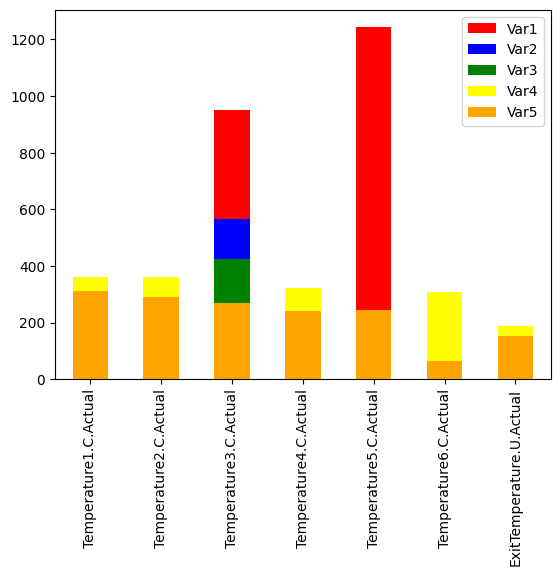

In [8]:
var1.plot.bar(color='red', label='Var1')
var2.plot.bar(color='blue', label='Var2')
var3.plot.bar(color='green', label='Var3')
var4.plot.bar(color='yellow', label='Var4')
var5.plot.bar(color='orange', label='Var5')

plt.legend()
plt.show()

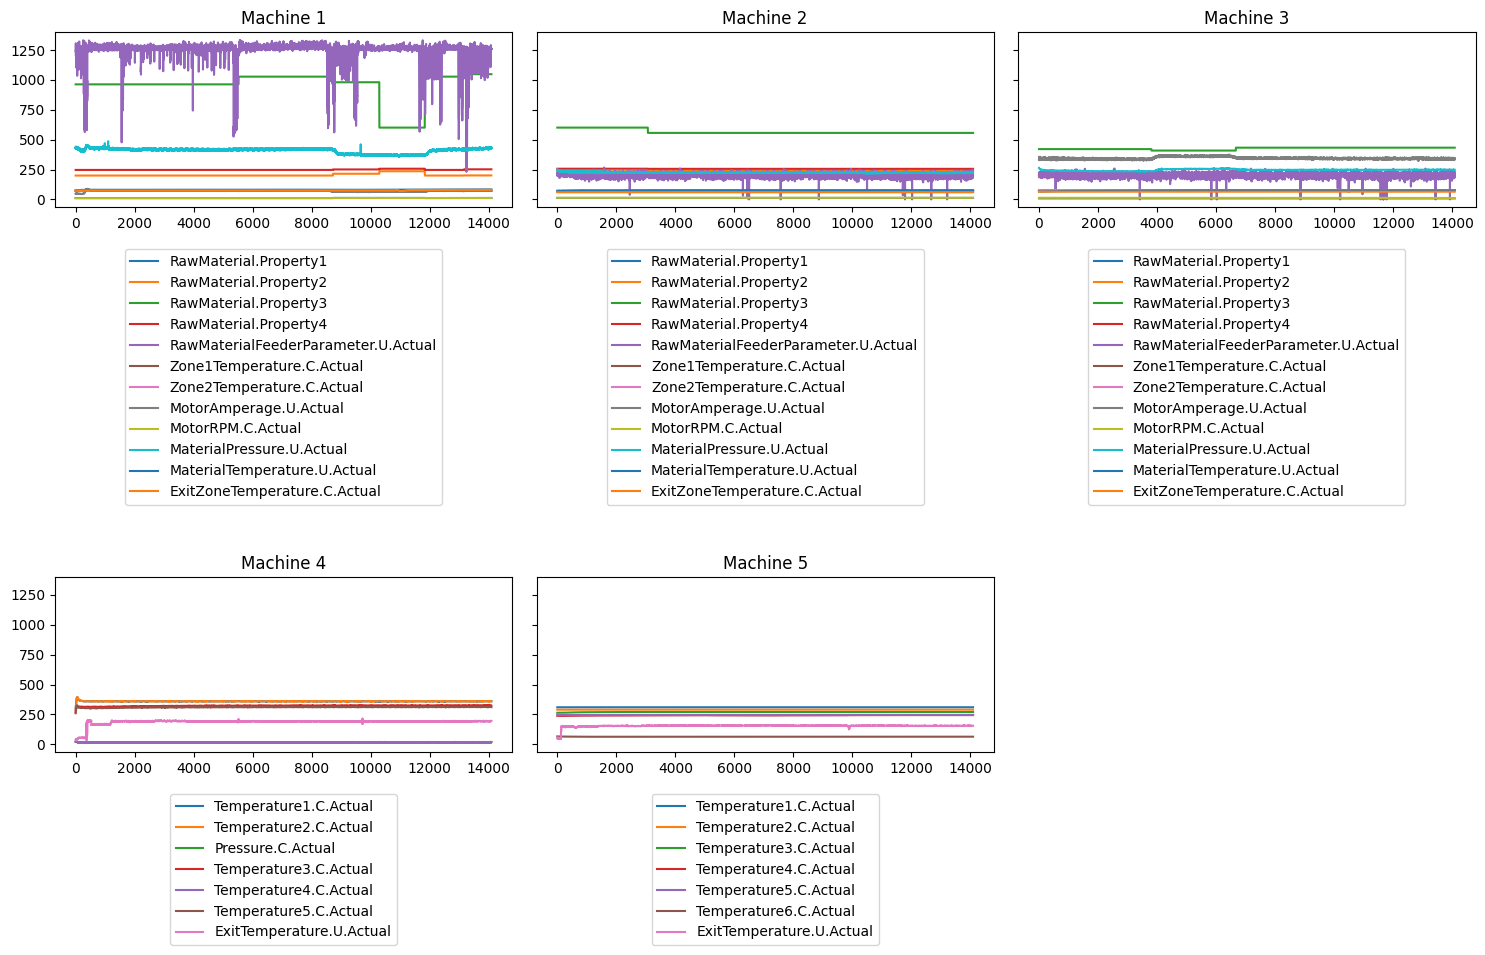

In [9]:
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 10))

axs[0, 0].plot(machine1_data, label='Machine1')
axs[0, 1].plot(machine2_data, label='Machine2')
axs[0, 2].plot(machine3_data, label='Machine3')
axs[1, 0].plot(machine4_data, label='Machine4')
axs[1, 1].plot(machine5_data, label='Machine5')

axs[0, 0].set_title('Machine 1')
axs[0, 1].set_title('Machine 2')
axs[0, 2].set_title('Machine 3')
axs[1, 0].set_title('Machine 4')
axs[1, 1].set_title('Machine 5')

axs[0, 0].legend(title=var1.index.name, labels=var1.index, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
axs[0, 1].legend(title=var2.index.name, labels=var2.index, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
axs[0, 2].legend(title=var3.index.name, labels=var3.index, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
axs[1, 0].legend(title=var4.index.name, labels=var4.index, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)
axs[1, 1].legend(title=var5.index.name, labels=var5.index, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)

fig.delaxes(axs[1, 2])

plt.tight_layout()

plt.show()

In [ ]:
x_rf = df[[]]
y_rf = ['']



In [10]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf,y_rf,test_size=0.2,random_state=42)

NameError: name 'X_rf' is not defined

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_rf_train, y_rf_train)

ValueError: could not convert string to float: '2019-03-06 13:30:34'